# Join the Corona Table and the Earthquake Table

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_to_home = '../'
datapath= path_to_home + 'data/'
corona = datapath + 'BIG-QUERY/covid-resulting-dataframe.csv'
usgs = datapath + 'USGS/earthquake_clean.csv'

rona = pd.read_csv(corona)
quake = pd.read_csv(usgs)

In [3]:
rona.shape

(6034, 10)

In [4]:
quake.shape

(16779, 34)

In [5]:
rona.columns

Index(['county_state', 'population', 'positive_tests', 'deaths', 'latitude',
       'longitude', 'deaths_per_100K', 'death_risk_index', 'cluster',
       'hotspot'],
      dtype='object')

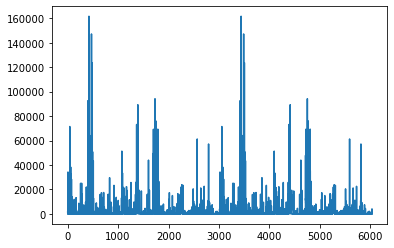

In [6]:
plt.plot(rona.death_risk_index)

In [7]:
rona.rename(columns=({'cluster': 'geo_region_cluster', 'hotspot': 'covid-hotspot'}), inplace=True)

In [8]:
quake.columns

Index(['type', 'id', 'mag', 'place', 'time', 'updated', 'tz', 'url', 'detail',
       'felt', 'cdi', 'mmi', 'alert', 'status', 'tsunami', 'sig', 'net',
       'code', 'ids', 'sources', 'types', 'nst', 'dmin', 'rms', 'gap',
       'magType', 'earthquake', 'title', 'point', 'long', 'lat', 'depth',
       'geometry', 'clusters'],
      dtype='object')

In [9]:
quake.rename(columns=({'long': 'longitude', 'lat': 'latitude'}), inplace=True)

In [10]:
junta = pd.concat([rona, quake])

In [11]:
junta.head()

,county_state,population,positive_tests,deaths,latitude,longitude,deaths_per_100K,death_risk_index,geo_region_cluster,covid-hotspot,...,dmin,rms,gap,magType,earthquake,title,point,depth,geometry,clusters
0,"Autauga County, Alabama",55869.0,1015.0,21.0,32.536667,-86.648333,37.587929,1412.852399,32.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Baldwin County, Alabama",223234.0,3101.0,22.0,30.733056,-87.720278,9.855130,97.123579,32.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Barbour County, Alabama",24686.0,598.0,5.0,31.865833,-85.396111,20.254395,410.240525,77.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Bibb County, Alabama",22394.0,363.0,2.0,32.997778,-87.126389,8.930964,79.762112,32.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Blount County, Alabama",57826.0,767.0,3.0,33.966667,-86.583333,5.187978,26.915113,54.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
junta.shape

(22813, 42)

In [13]:
junta.dtypes

county_state           object
population            float64
positive_tests        float64
deaths                float64
latitude              float64
longitude             float64
deaths_per_100K       float64
death_risk_index      float64
geo_region_cluster    float64
covid-hotspot         float64
type                   object
id                     object
mag                   float64
place                  object
time                   object
updated               float64
tz                    float64
url                    object
detail                 object
felt                  float64
cdi                   float64
mmi                   float64
alert                  object
status                 object
tsunami               float64
sig                   float64
net                    object
code                   object
ids                    object
sources                object
types                  object
nst                   float64
dmin                  float64
rms       

In [14]:
junta.isna().sum()

county_state          16779
population            16779
positive_tests        16779
deaths                16779
latitude                  0
longitude                 0
deaths_per_100K       16779
death_risk_index      16779
geo_region_cluster    19799
covid-hotspot         19799
type                   6034
id                     6034
mag                    6034
place                  6034
time                   6034
updated                6034
tz                    14043
url                    6034
detail                 6034
felt                   6034
cdi                    6034
mmi                    6034
alert                 21868
status                 6034
tsunami                6034
sig                    6034
net                    6034
code                   6034
ids                    6034
sources                6034
types                  6034
nst                    6034
dmin                   6034
rms                    6034
gap                    6034
magType             

In [15]:
junta.to_csv(datapath+'PRESENTATION/rona_quakes.csv')